 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as datetims
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns-create path
whale_csvpath=Path("../python-homework/whale_returns.csv")
whale_df=pd.read_csv(whale_csvpath,index_col="Date",infer_datetime_format=True, parse_dates=True)

 # Set the date as the index to the DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls

whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algorithmic_csvpath=Path("../python-homework/algo_returns.csv")
algo_df=pd.read_csv(algorithmic_csvpath)
#algo_df.head()
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)

# Drop the extra date column
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()
#algo_df.head()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices

sp500_csvpath=Path("../python-homework/sp500_history.csv")
sp500_df=pd.read_csv(sp500_csvpath)
#Overwrite data after changing format to match dates in other files
#sp500_df["Date"]=pd.to_datetime(sp500_df["Date"])
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
#sp500_df.head()
# Drop the extra date column
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
#sp500_df["Close"]= sp500_df["Close"].astype("float")
sp500_df["Close"]= sp500_df["Close"].str.replace('$','').astype("float")
sp500_df.head()

C:\Users\sprin\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [12]:
# Calculate Daily Returns and Drop null calues
daily_returns = sp500_df.pct_change().dropna()
daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns=daily_returns.rename(columns={"Close":"SP500"})
daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily_returns = pd.concat([whale_df, algo_df,daily_returns], axis = "columns",join = "inner")
df_daily_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for Investors, Algorithm and SP500 '}, xlabel='Date'>

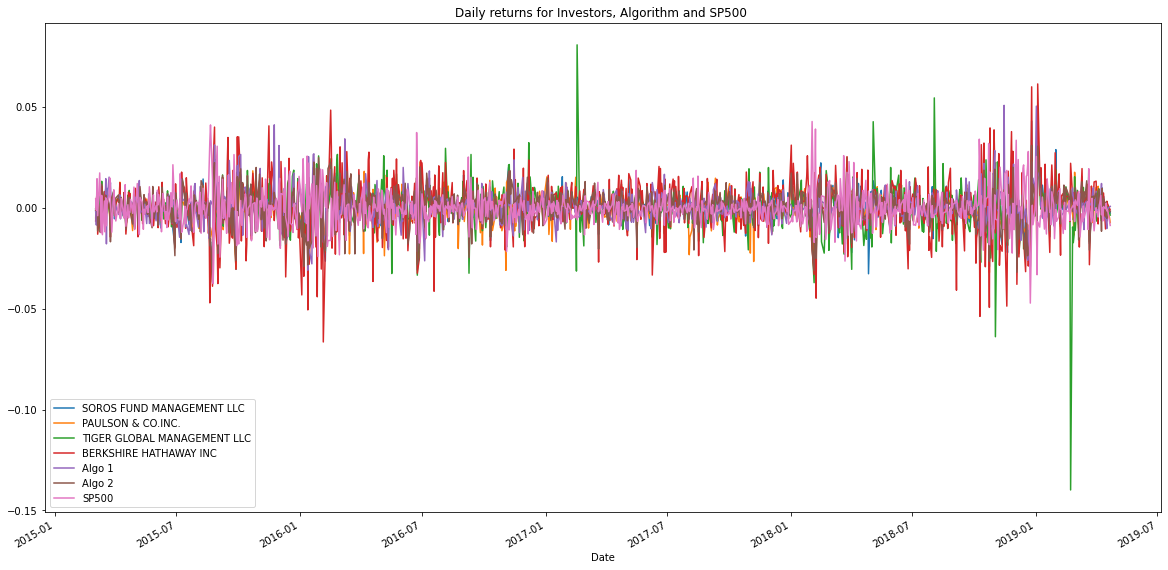

In [44]:
# Plot daily returns of all portfolios
df_daily_returns.plot(figsize=(20,10), title="Daily returns for Investors, Algorithm and SP500 ")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Investors, Algorithm and SP500'}, xlabel='Date'>

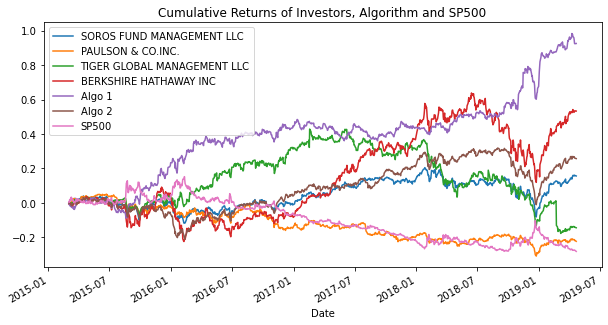

In [45]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_daily_returns).cumprod()-1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Investors, Algorithm and SP500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

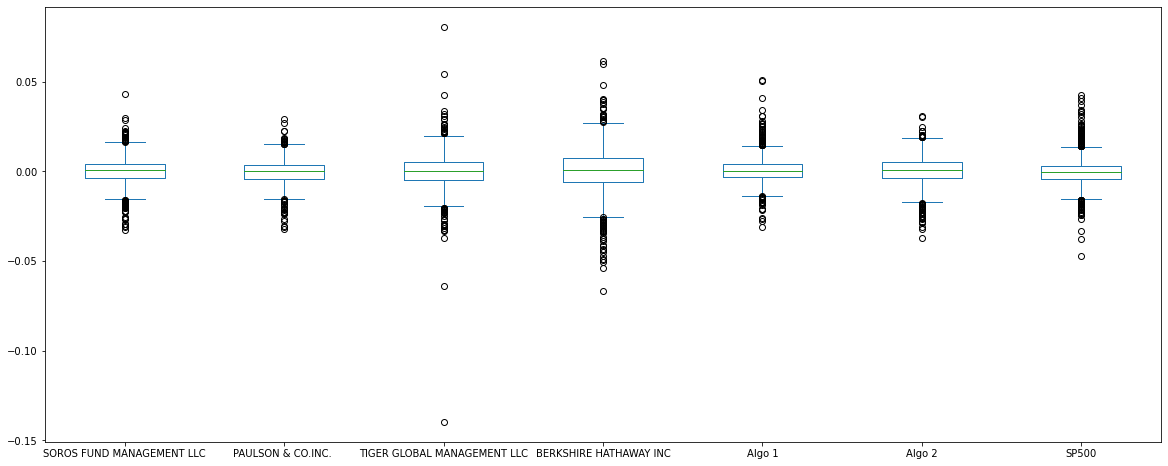

In [16]:
# Box plot to visually show risk
df_daily_returns.plot(kind = "box", figsize = (20,8))

### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
#all_portfolio_std = df_daily_returns.std()
#all_portfolio_std.head()
df_daily_std= df_daily_returns.std()
#rename(columns = {0:"std"})
df_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [46]:
# Determine which portfolios are riskier than the S&P 500
df_daily_returns.std() > df_daily_returns["SP500"].std()
#Tiger Global Management and Berkshire Hathaway are more risky than the S&P 500.

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation-21 day window '}, xlabel='Date'>

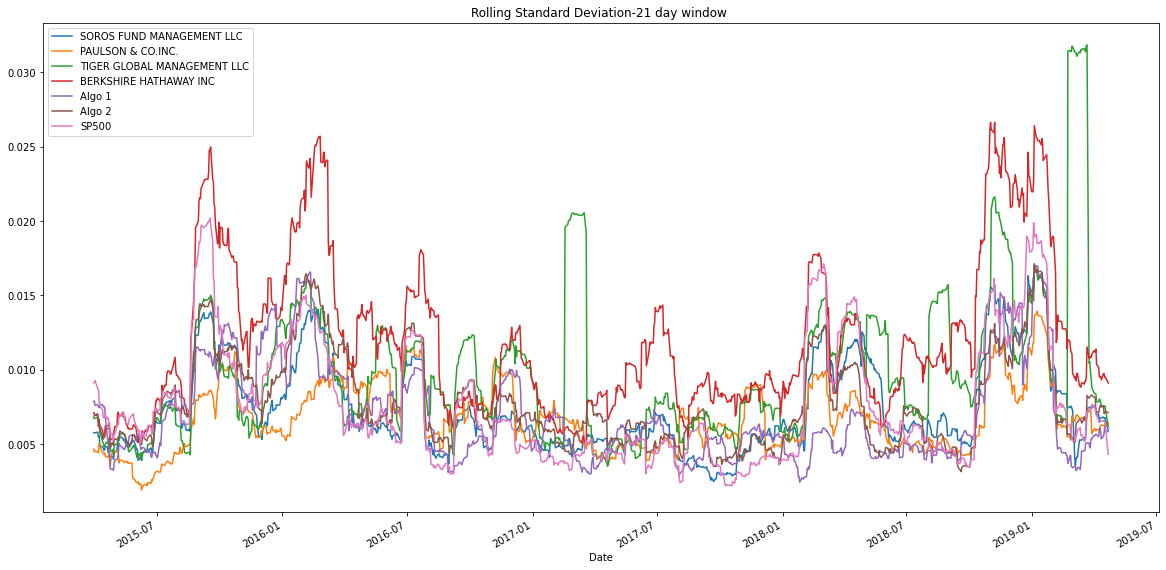

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

rolling_std=df_daily_returns.rolling(window=21).std()
rolling_std.plot(figsize=(20,10), title="Rolling Standard Deviation-21 day window ")


### Calculate and plot the correlation

In [49]:
# Calculate the correlation
# Display the correlation matrix
correlation = df_daily_returns.corr()
correlation.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta Trend '}, xlabel='Date'>

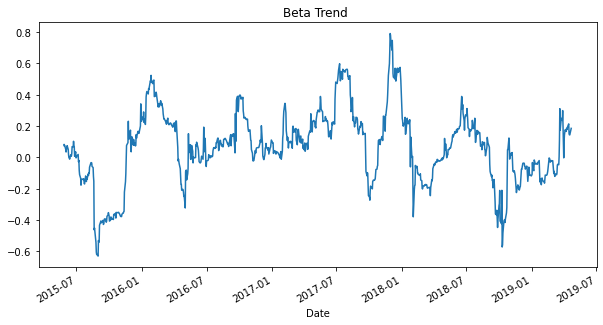

In [26]:
# Calculate covariance of a single portfolio
covariance = df_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily_returns['SP500'])
# Calculate variance of S&P 500
variance =df_daily_returns['SP500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10,5), title="Beta Trend ")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling Window '}, xlabel='Date'>

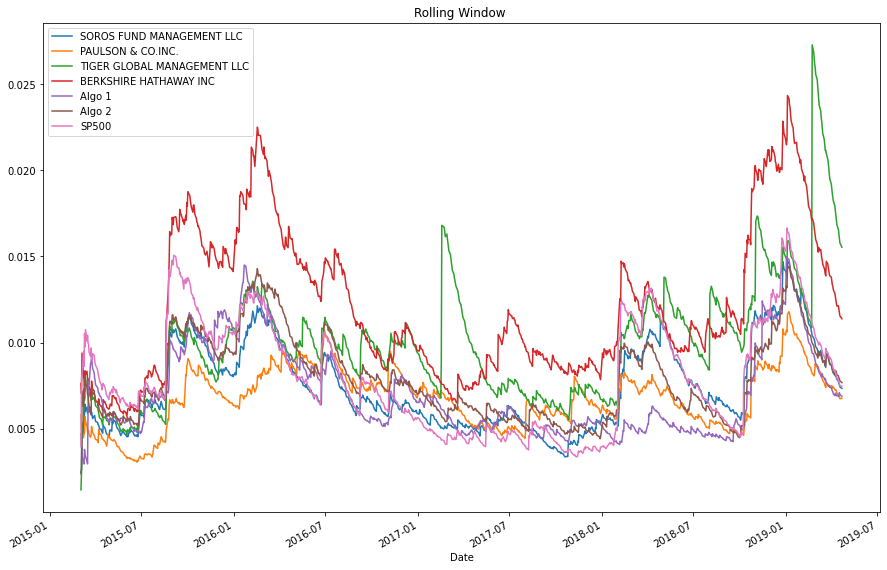

In [29]:
# Use `ewm` to calculate the rolling window
df_daily_returns.ewm(halflife=21).std().plot(figsize=(15,10), title="Rolling Window ")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
#sharpe_ratios = df_daily_returns.mean() * 252 /annualized_std
#sharpe_ratios.head()

sharpe_ratios = (df_daily_returns.mean()*252)/(df_daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

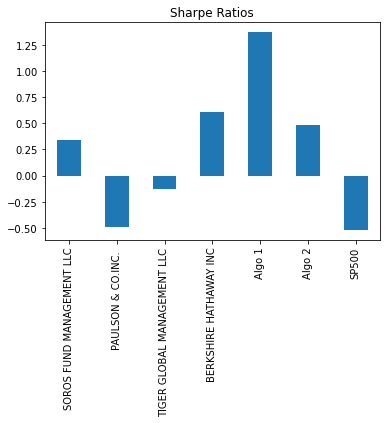

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
aapl_csvpath=Path("../python-homework/aapl_historical.csv")
aapl_df=pd.read_csv(aapl_csvpath)
#aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
#tsla_df = pd.read_csv(tsla_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df=pd.read_csv(aapl_csvpath,index_col="Trade DATE",infer_datetime_format=True, parse_dates=True).rename(columns={"NOCP":"AAPL"})

#aapl_df.drop(columns=['Date'], inplace=True)
aapl_df.head()

,Symbol,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [38]:
# Reading data from 2nd stock
goog_csvpath=Path("../python-homework/goog_historical.csv")
goog_df=pd.read_csv(goog_csvpath)
goog_df=pd.read_csv(goog_csvpath,index_col="Trade DATE",infer_datetime_format=True, parse_dates=True).rename(columns={"NOCP":"GOOG"})

#goog_df.rename(columns={"NOCP":"GOOG"})

goog_df.head()

,Symbol,GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [39]:
# Reading data from 2nd stock
cost_csvpath=Path("../python-homework/cost_historical.csv")
cost_df=pd.read_csv(cost_csvpath)
cost_df=pd.read_csv(cost_csvpath,index_col="Trade DATE",infer_datetime_format=True, parse_dates=True).rename(columns={"NOCP":"COST"})
cost_df.head()

,Symbol,COST
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [40]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_df,goog_df,cost_df], axis = "columns",join = "inner")
custom_portfolio.drop(columns=['Symbol'], inplace=True)
custom_portfolio.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [41]:
# Calculate daily returns
# Drop NAs
# Display sample data
daily_returns_custom_portfolio = custom_portfolio.pct_change().dropna()
daily_returns_custom_portfolio

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Display sample data

weighted_returns = daily_returns_custom_portfolio.dot(weights)
weighted_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
#portfolio_returns = pd.concat((weighted_returns,df_daily_returns), axis = 1, join = "inner")
df_daily_returns["Custom Portfolio"]=weighted_returns
df_daily_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_daily_returns.dropna(inplace=True)
df_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
df_daily_std= df_daily_returns.std()
annualized_std = df_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
SP500                          0.152147
Custom Portfolio               0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation '}, xlabel='Date'>

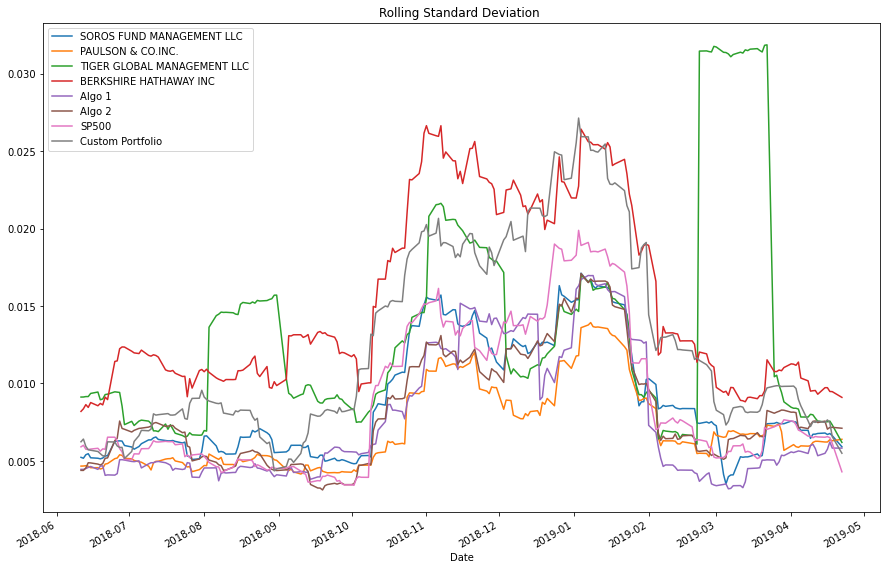

In [46]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
rolling_std=df_daily_returns.rolling(window=21).std()
rolling_std.plot(figsize=(15,10), title="Rolling Standard Deviation ")

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
correlation = df_daily_returns.corr()
correlation.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.061503
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.025680
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.036047
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.006755
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.073296
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.039910
SP500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.869976
Custom Portfolio,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,0.869976,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta Trend'}, xlabel='Date'>

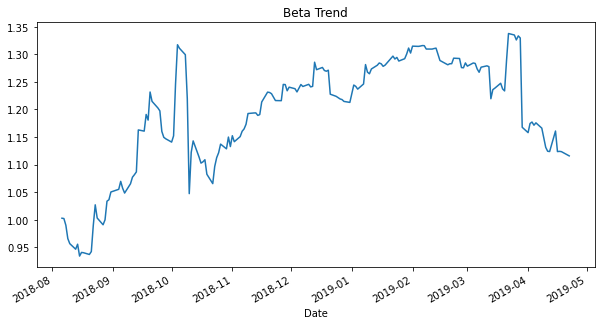

In [49]:
# Calculate and plot Beta
covariance = df_daily_returns['Custom Portfolio'].rolling(window=60).cov(df_daily_returns['SP500'])
# Calculate variance of S&P 500
variance =df_daily_returns['SP500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10,5), title="Beta Trend")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (df_daily_returns.mean()*252)/(df_daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500                         -0.432942
Custom Portfolio              -0.613547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

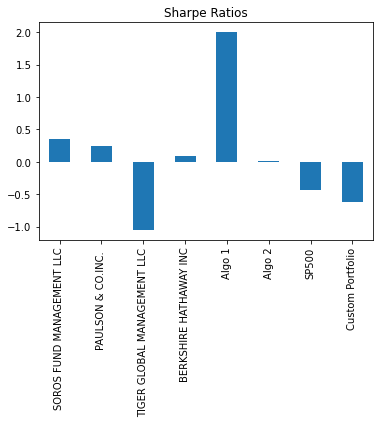

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio did as well as the SP500 but not better than Algo 1.